Import the neccessary libraries

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score,confusion_matrix

Data Loading

In [47]:
try:
    df = pd.read_csv("matches.csv")
    print("Data loaded successfully....")
except FileNotFoundError:
    print("Error: 'matches.csv' not found. Please make sure the file is in the same directory")
    exit()

df

Data loaded successfully....


,Unnamed: 0,date,time,comp,round,day,venue,result,gf,ga,...,match report,notes,sh,sot,dist,fk,pk,pkatt,season,team
0,1,2021-08-15,16:30,Premier League,Matchweek 1,Sun,Away,L,0.0,1.0,...,Match Report,NaN,18.0,4.0,16.9,1.0,0.0,0.0,2022,Manchester City
1,2,2021-08-21,15:00,Premier League,Matchweek 2,Sat,Home,W,5.0,0.0,...,Match Report,NaN,16.0,4.0,17.3,1.0,0.0,0.0,2022,Manchester City
2,3,2021-08-28,12:30,Premier League,Matchweek 3,Sat,Home,W,5.0,0.0,...,Match Report,NaN,25.0,10.0,14.3,0.0,0.0,0.0,2022,Manchester City
3,4,2021-09-11,15:00,Premier League,Matchweek 4,Sat,Away,W,1.0,0.0,...,Match Report,NaN,25.0,8.0,14.0,0.0,0.0,0.0,2022,Manchester City
4,6,2021-09-18,15:00,Premier League,Matchweek 5,Sat,Home,D,0.0,0.0,...,Match Report,NaN,16.0,1.0,15.7,1.0,0.0,0.0,2022,Manchester City
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1384,38,2021-05-02,19:15,Premier League,Matchweek 34,Sun,Away,L,0.0,4.0,...,Match Report,NaN,8.0,1.0,17.4,0.0,0.0,0.0,2021,Sheffield United
1385,39,2021-05-08,15:00,Premier League,Matchweek 35,Sat,Home,L,0.0,2.0,...,Match Report,NaN,7.0,0.0,11.4,1.0,0.0,0.0,2021,Sheffield United
1386,40,2021-05-16,19:00,Premier League,Matchweek 36,Sun,Away,W,1.0,0.0,...,Match Report,NaN,10.0,3.0,17.0,0.0,0.0,0.0,2021,Sheffield United
1387,41,2021-05-19,18:00,Premier League,Matchweek 37,Wed,Away,L,0.0,1.0,...,Match Report,NaN,11.0,1.0,16.0,1.0,0.0,0.0,2021,Sheffield United


Data Preprocessing

In [48]:
# Check for missing values
df_missing = df.isnull().sum()
print("Missing Values")
print(df_missing)

# The result column is our target variable. We'll encode it to a numerical format
df["result_encoded"] = df["result"].map({
    "W":1,
    "D":0,
    "L":-1
})

# Check for duplicated rows
df_duplicated = df.duplicated().sum()
print("Duplicated Rows")
print(df_duplicated)

# Drop any missing values
df.dropna(inplace=True)

# Check for missing values again
df_missing = df.isnull().sum()
print("Missing Values")
print(df_missing)

# Drop irrelevant columns that won't help with prediction
#df = df.drop(columns=['comp', 'round', 'day', 'captain', 'formation', 'referee', 'match report', 'notes', 'attendance'])

# Handle team names, which are categorical
# We use LabelEncoder to convert them into numerical labels
le_team = LabelEncoder()
le_opponent = LabelEncoder()
df['team_encoded'] = le_team.fit_transform(df["team"])
df["opponent_encoded"] = le_opponent.fit_transform(df["opponent"])

# Handle the "venue" feature. It's binary, so we can map to 0 and 1
df["venue_encoded"] = df["venue"].map({
    "Home":1,
    "Away":0
})

Missing Values
Unnamed: 0         0
date               0
time               0
comp               0
round              0
day                0
venue              0
result             0
gf                 0
ga                 0
opponent           0
xg                 0
xga                0
poss               0
attendance       696
captain            0
formation          0
referee            0
match report       0
notes           1389
sh                 0
sot                0
dist               1
fk                 0
pk                 0
pkatt              0
season             0
team               0
dtype: int64
Duplicated Rows
0
Missing Values
Unnamed: 0        0
date              0
time              0
comp              0
round             0
day               0
venue             0
result            0
gf                0
ga                0
opponent          0
xg                0
xga               0
poss              0
attendance        0
captain           0
formation         0
referee    

Feature Engineering

In [ ]:
# Select the feature (X) and the target variable (y)
# We choose features that represent a team's perfomance and the match context
features = ['venue_encoded', 'sh', 'sot', 'dist', 'fk', 'pk', 'pkatt', 'xg', 'xga', 'poss', 'team_encoded', 'opponent_encoded']
X = df[features]
y = df["result_encoded"]

Data Splitting

In [ ]:
# Split the data into training and testing sets
# 80% of the data will be used for training while 20% of the data will be used for testing
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

Data Scaling

In [ ]:
# Standardize the features. This is a cruicial step, especially for models like SVM and Logistic Regression
# that are sensitive to the scale of the input features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

Visualization Before Training

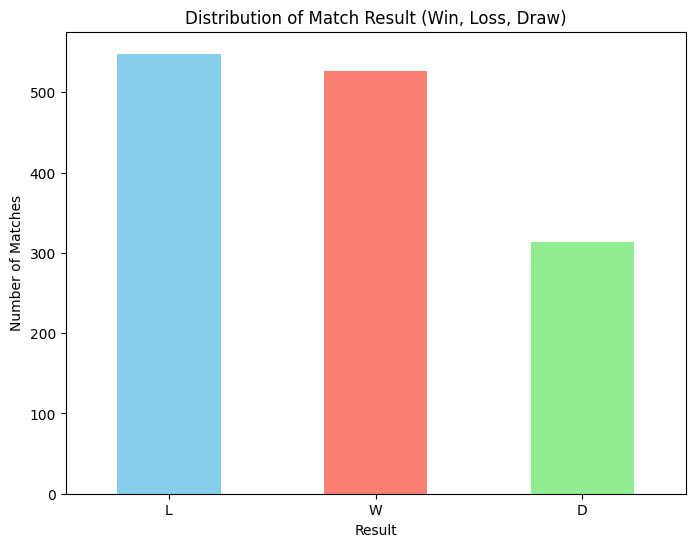

In [ ]:
# A visualization of the class didtributoion helps us to understand if the dataset is balanced
plt.figure(figsize=(8,6))
df["result"].value_counts().plot(kind="bar",color=["skyblue","salmon","lightgreen"])
plt.title("Distribution of Match Result (Win, Loss, Draw)")
plt.xlabel("Result")
plt.ylabel("Number of Matches")
plt.xticks(rotation=0)
plt.show()

Model Training and Comparison

In [ ]:
# Define the models we want to compare. We'll use a variety of common classifiers
classifier = {
    "Logistic Regression":LogisticRegression(random_state=42,max_iter=1000),
    "Random Forest": RandomForestClassifier(random_state=42),
    "K-Nearest Neighbours": KNeighborsClassifier(n_neighbors=5),
    "Support Vector Machine": SVC(random_state=42,probability=True) # probabilty=True is needed for predict_proba
}

# Dictionary to store the results of each model
model_results = {}

# Loop through each classifier, train it and evaluate its performance
for name, clf in classifier.items():
    print(f"Training {name}...")
    clf.fit(X_train_scaled,y_train)
    y_pred = clf.predict(X_test_scaled)

    # Calculate the store the performance metrics
    accuracy = accuracy_score(y_test,y_pred)
    f1 = f1_score(y_test,y_pred,average="weighted")
    precision = precision_score(y_test,y_pred,average="weighted",zero_division=0)
    recall = recall_score(y_test,y_pred,average="weighted",zero_division=0)


    model_results[name] = {
        "Accuracy": accuracy,
        "F1 Score": f1,
        "Precison": precision,
        "Recall" : recall
    }

    print(f"Accuracy: {accuracy:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print(f"Precison: {precision:.4f}")
    print(f"Recall: {recall:.4f}")

Training Logistic Regression...
Accuracy: 0.6403
F1-Score: 0.5910
Precison: 0.5640
Recall: 0.6403
Training Random Forest...
Accuracy: 0.6367
F1-Score: 0.6053
Precison: 0.6069
Recall: 0.6367
Training K-Nearest Neighbours...
Accuracy: 0.5755
F1-Score: 0.5699
Precison: 0.5652
Recall: 0.5755
Training Support Vector Machine...
Accuracy: 0.6475
F1-Score: 0.6153
Precison: 0.6168
Recall: 0.6475


Find the best model

In [ ]:
# Find the best model based on accuracy.
best_model_name = max(model_results, key=lambda name: model_results[name]['Accuracy'])
best_model = classifier[best_model_name]
print(f"\nConclusion: The best model is the {best_model_name} with an accuracy of {model_results[best_model_name]['Accuracy']:.4f}.")


Conclusion: The best model is the Support Vector Machine with an accuracy of 0.6475.


Visualization After Training

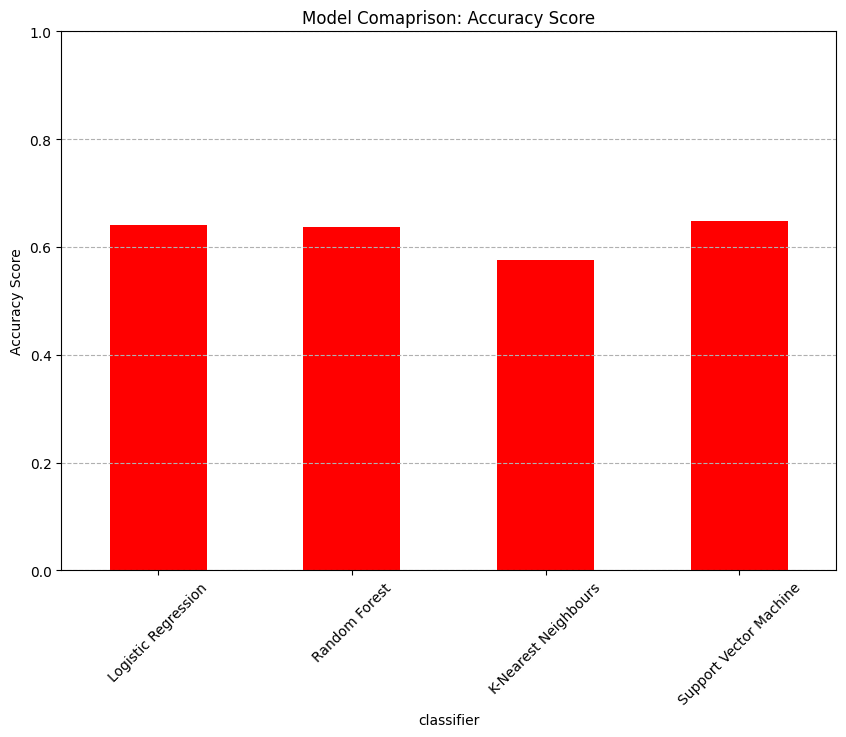

In [ ]:
# Create a DataFrame from the models results for easy plotting
results_df = pd.DataFrame(model_results).transpose()

# Create a bar plot to compare the model's accuracy
plt.figure(figsize=(10,7))
results_df["Accuracy"].plot(kind="bar",color="red")
plt.title("Model Comaprison: Accuracy Score")
plt.xlabel("classifier")
plt.ylabel("Accuracy Score")
plt.ylim(0,1.0)
plt.xticks(rotation=45)
plt.grid(axis="y",linestyle="--")
plt.show()

Interactive Prediction Input

In [ ]:
print("Predicting a Match Outcome")


def predict_match(home_team_name,away_team_name):
    """
    Predicts the probabilty of a match outcome for two given teams

    Parameters:
    - home_team_name (str): The name of the home team
    - away_team_name (str): The name of the away team
    """

    # Create a DataFrame for the user input
    # The feature values for 'sh', 'sot', 'dist', etc., are set to the mean of the training data
    # as a simple baseline for a new, unknown match.
    # A more advanced model would use historical team stats to make this more accurate.
    input_data = pd.DataFrame({
        "venue_encoded": [1], # Home team is always at home (venue=1)
        "sh": [X_train["sh"].mean()],
        "sot": [X_train["dist"].mean()],
        'dist': [X_train['dist'].mean()],
        'fk': [X_train['fk'].mean()],
        'pk': [X_train['pk'].mean()],
        'pkatt': [X_train['pkatt'].mean()],
        'xg': [X_train['xg'].mean()],
        'xga': [X_train['xga'].mean()],
        'poss': [X_train['poss'].mean()],
        'team_encoded': [0], # Placeholder, will be updated
        'opponent_encoded': [0] # Placeholder, will be updated
    })

    try:
        # Encode the team names using the LabelEncoders fitted on the training data
        input_data["team_encoded"] = le_team.transform([home_team_name])
        input_data["opponent_encoded"] = le_opponent.transform([away_team_name])

    except ValueError as e:
        # Handle cases where the team name is not in the training data
        print(f"Error: One of the teams ({home_team_name} or {away_team_name}) was not found in the dataset")
        print("Please use a team name that was  in the original matches.csv file")


    # Scale the input data using the same scaler fitted on the training data
    input_scaled = scaler.transform(input_data)
    
    # Use the best model to predict the probabilities for each outcome
    probabilities =  best_model.predict_proba(input_scaled)[0]

    # Map the probabilities back to the original labels
    outcome_labels = ["Loss","Draw","Win"]
    prob_loss = probabilities[np.where(best_model.classes_ == -1)[0][0]]
    prob_draw = probabilities[np.where(best_model.classes_ == 0)[0][0]]
    prob_win = probabilities[np.where(best_model.classes_ == 1)[0][0]]

    # Print the formatted output
    print("Prediction for the match between", home_team_name, "and", away_team_name, "----")
    print(f"{home_team_name} Win: {prob_win*100:.2f}%")
    print(f"Draw: {prob_draw*100:.2f}%")
    print(f"{away_team_name} Win: {prob_loss:.2f}%")

# Get user input for the teams.
home_team = input("Enter the home team name:")
away_team = input("Enter the away team name:")

# Call the predict function with the user's input
predict_match(home_team,away_team)